In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from skimage.io import imread , imshow
from skimage import color
from skimage import measure

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    ORIG = None
    
    def __init__(self, image, clusters):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = imread(self.IMAGE)
        self.ORIG = img.copy()
        
        #convert to rgb from bgr
        img = color.rgb2hsv(img)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS, init = 'k-means++', random_state = 0)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS
    
    def show(self):
        cv2.imshow('img',self.ORIG)
        

img = 'segmentation_WBC-master/Dataset 1/200.bmp'
clusters = 4
dc = DominantColors(img, clusters) 

#cv2.imshow('image',img)
colors = dc.dominantColors()
#cv2.imshow('Test',dc.mark_label(212,181,213))

print(colors)
dc.ORIG.shape[1]

[[0.91824869 0.67132992 0.5678064 ]
 [0.16548459 0.25891769 0.99713408]
 [0.89210619 0.42992394 0.51053714]
 [0.0449572  0.44711575 0.66897105]]


120

In [2]:
dc.LABELS
new = np.reshape(dc.LABELS, (-1, dc.ORIG.shape[0]))

In [3]:
new
new.shape[0]

120

In [4]:
img = cv2.imread(img)
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
for i in range(0,dc.ORIG.shape[0]):
    for j in range(0,dc.ORIG.shape[1]):
        if new[i][j] == 1:
            gray_img[i][j] = 0
        elif new[i][j] == 2:
            gray_img[i][j] = 50
        elif new[i][j] == 3:
            gray_img[i][j] = 127
        else:
            gray_img[i][j] = 255

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


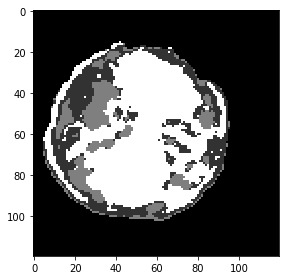

In [5]:
imshow(gray_img)

(367, 2)


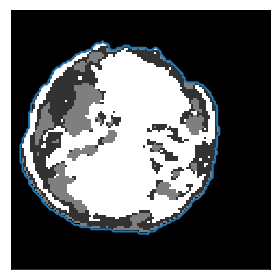

In [6]:
contours = measure.find_contours(gray_img, 0.7)
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(gray_img, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    print(contour.shape)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig('c_out.png',bbox_inches='tight',pad_inches=0)
plt.show()